In [22]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn.model_selection import train_test_split #разделение выборки
from sklearn import preprocessing #предобработка
%matplotlib inline
plt.style.use('seaborn')

C:\Users\79265\AppData\Local\Temp\ipykernel_16644\2408503256.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# Классификация

In [23]:
df = pd.read_csv('data/churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [24]:
df.shape

(10000, 14)

### Анализ данных, предобработка

In [25]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [26]:
# выделение данных, относящихся к Германии
df = df[df['Geography'] == 'Germany']
df.shape

(2509, 14)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2509 entries, 7 to 9998
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        2509 non-null   int64  
 1   CustomerId       2509 non-null   int64  
 2   Surname          2509 non-null   object 
 3   CreditScore      2509 non-null   int64  
 4   Geography        2509 non-null   object 
 5   Gender           2509 non-null   object 
 6   Age              2509 non-null   int64  
 7   Tenure           2509 non-null   int64  
 8   Balance          2509 non-null   float64
 9   NumOfProducts    2509 non-null   int64  
 10  HasCrCard        2509 non-null   int64  
 11  IsActiveMember   2509 non-null   int64  
 12  EstimatedSalary  2509 non-null   float64
 13  Exited           2509 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 294.0+ KB


In [28]:
# избавление от заведомо неинформативных признаков: страна, номер строки, идентификатор пользователя и имя клиента
cols_to_del = ['Geography', 'RowNumber', 'CustomerId', 'Surname']
df = df.drop(cols_to_del, axis=1)
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Female,29,4,115046.74,4,1,0,119346.88,1
15,616,Male,45,3,143129.41,2,0,1,64327.26,0
16,653,Male,58,1,132602.88,1,1,0,5097.67,1
26,756,Male,36,2,136815.64,1,1,1,170041.95,0
28,574,Female,43,3,141349.43,1,1,1,100187.43,0


In [29]:
# Проверка на наличие пропусков
df.isnull().sum()

CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Feature Engineering

Создание следующих признаков:

BalanceSalaryRatio — отношение баланса на счетах к заработной плате клиента;    
TenureByAge — отношение времени пользования банком к возрасту клиента;    
CreditScoreGivenAge — отношение кредитного рейтинга к возрасту клиента.

In [58]:
df['BalanceSalaryRatio'] = df['Balance'] / df['EstimatedSalary']
df['TenureByAge'] = df['Tenure'] / df['Age']
df['CreditScoreGivenAge'] = df['CreditScore'] / df['Age']

df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
7,376,0,29,4,115046.74,4,1,0,119346.88,1,0.963969,0.137931,12.965517
15,616,1,45,3,143129.41,2,0,1,64327.26,0,2.225020,0.066667,13.688889
16,653,1,58,1,132602.88,1,1,0,5097.67,1,26.012449,0.017241,11.258621
26,756,1,36,2,136815.64,1,1,1,170041.95,0,0.804599,0.055556,21.000000
28,574,0,43,3,141349.43,1,1,1,100187.43,0,1.410850,0.069767,13.348837


In [31]:
df.shape

(2509, 13)

In [32]:
# кодировка категориального признака Gender в бинарный столбец (1 — 'Male', 0 — 'Female')
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
7,376,0,29,4,115046.74,4,1,0,119346.88,1,0.963969,0.137931,12.965517
15,616,1,45,3,143129.41,2,0,1,64327.26,0,2.225020,0.066667,13.688889
16,653,1,58,1,132602.88,1,1,0,5097.67,1,26.012449,0.017241,11.258621
26,756,1,36,2,136815.64,1,1,1,170041.95,0,0.804599,0.055556,21.000000
28,574,0,43,3,141349.43,1,1,1,100187.43,0,1.410850,0.069767,13.348837


### Подготовка выборки к обучению модели

In [33]:
# Разделим набор данных на матрицу наблюдений X и столбец ответов y
X = df.drop(['Exited'], axis=1)
y = df['Exited']

In [34]:
X.shape

(2509, 12)

In [35]:
y.shape

(2509,)

In [36]:
# нормализация матрицы наблюдений X
scaler = preprocessing.MinMaxScaler()
scaler.fit(X)
X_sc = scaler.transform(X)

Прежде чем перейти к этапу разделения выборки на тренировочную и тестовую, посмотрим на сбалансированность данных. Для этого воспользуемся методом value_counts() и выведем количество наблюдений каждого из классов в долевом соотношении от общего количества наблюдений:

In [37]:
y.value_counts(normalize=True)

0    0.675568
1    0.324432
Name: Exited, dtype: float64

In [38]:
# Выполним стратифицированное разбиение
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, stratify=y, random_state=0)

print(f'Train shape: {X_train.shape}')
print(f'Test shape: {X_test.shape}')

Train shape: (1881, 12)
Test shape: (628, 12)


In [39]:
# Проверка сбалансированности соотношения доли лояльных и ушедших клиентов в каждой из выборок
print(f'Train: {y_train.value_counts(normalize=True)}')
print('\n')
print(f'Test: {y_test.value_counts(normalize=True)}')

Train: 0    0.675704
1    0.324296
Name: Exited, dtype: float64


Test: 0    0.675159
1    0.324841
Name: Exited, dtype: float64


In [40]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, sep='\n')

(1881, 12)
(628, 12)
(1881,)
(628,)


### Обучение модели логистической регрессии

In [41]:
# создание объекта класса LogisticRegression
log_reg = linear_model.LogisticRegression(
    solver='sag', 
    random_state=42
)
# обучение модели
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='sag')

Выводим отчет по метрикам для тренировочной и тестовой выборок

In [42]:
# Для тренировочной выборки
# Делаем предсказание класса:
y_train_pred = log_reg.predict(X_train)
# Метрика
print(f'Train F1: {round(metrics.f1_score(y_train, y_train_pred), 2)}')

Train F1: 0.49


In [43]:
# Для тестовой выборки
# Делаем предсказание класса:
y_test_pred = log_reg.predict(X_test)
# Метрика
print(f'Test F1: {round(metrics.f1_score(y_test, y_test_pred), 2)}')

Test F1: 0.47


In [44]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, sep='\n')

(1881, 12)
(628, 12)
(1881,)
(628,)


In [45]:
print(y_train_pred.shape, y_test_pred.shape)

(1881,) (628,)


## Итерация 2

Генерация полиномиальных признаков степени 3

In [46]:
# создание генератора полиномиальных признаков
poly = preprocessing.PolynomialFeatures(degree=3, include_bias=False)
poly.fit(X_train)

#Генерируем полиномиальные признаки для тренировочной выборки
X_train_poly = poly.transform(X_train)
#Генерируем полиномиальные признаки для тестовой выборки
X_test_poly = poly.transform(X_test)

print(f'Train shape: {X_train_poly.shape}')
print(f'Test shape: {X_test_poly.shape}')

Train shape: (1881, 454)
Test shape: (628, 454)


### Обучение модели логистической регрессии

In [48]:
# создание объекта класса LogisticRegression
log_reg_poly = linear_model.LogisticRegression(
    solver='sag', 
    random_state=42,
    max_iter=1000
)
# обучение модели
log_reg_poly.fit(X_train_poly, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='sag')

Выводим отчет по метрикам для тренировочной и тестовой выборок

In [49]:
# Для тренировочной выборки
# Делаем предсказание класса:
y_train_pred_poly = log_reg_poly.predict(X_train_poly)
# Метрика
print(f'Train F1: {round(metrics.f1_score(y_train, y_train_pred_poly), 2)}')

Train F1: 0.66


In [50]:
# Для тестовой выборки
# Делаем предсказание класса:
y_test_pred_poly = log_reg_poly.predict(X_test_poly)
# Метрика
print(f'Test F1: {round(metrics.f1_score(y_test, y_test_pred_poly), 2)}')

Test F1: 0.64


Подбор оптимального значения порога вероятности, при котором наблюдается наибольшее значение целевой метрики на тестовой выборке

In [51]:
# оценка вероятности ухода для каждого клиента
y_test_proba_pred = log_reg_poly.predict_proba(X_test_poly)[:, 1]
# Для удобства завернём numpy-массив в Pandas Series
y_test_proba_pred = pd.Series(y_test_proba_pred)
# список для "хранения" значений метрики
f1_scores = []

# Сгенерируем набор вероятностных порогов в диапазоне от 0.1 до 1
thresholds = np.arange(0.1, 1, 0.05)
# В цикле будем перебирать сгенерированные пороги
for elem in thresholds:
    # клиентов, для кот. вероятность ухода > elem, относим к классу 1. иначе - 0
    y_test_pred = y_test_proba_pred.apply(lambda x: 1 if x > elem else 0)
    #Считаем метрикy и добавляем в список
    f1_scores.append(metrics.f1_score(y_test, y_test_pred))

Визуализация метрики при различных threshold

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


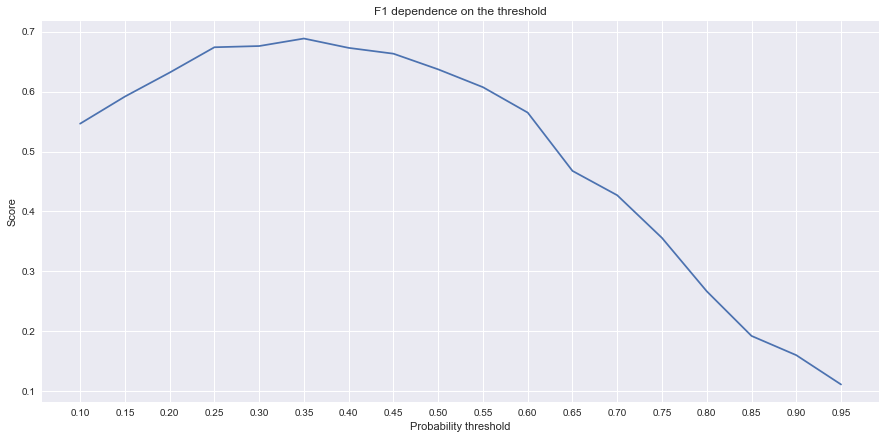

In [52]:
fig, ax = plt.subplots(figsize=(15, 7))
#Строим линейный график зависимости F1 от threshold
ax.plot(thresholds, f1_scores)

#Даём графику название и подписываем оси
ax.set_title('F1 dependence on the threshold')
ax.set_xlabel('Probability threshold')
ax.set_ylabel('Score')
#Устанавливаем отметки по оси x
ax.set_xticks(thresholds) 
#Отображаем легенду
ax.legend();

In [53]:
#Задаём оптимальный порог вероятностей
threshold_opt = 0.35

# клиентов, для которых вероятность ухода > 0.35, относим к классу 1, иначе - 0
y_pred_opt = y_test_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)

# Метрика
print(f'Test F1: {round(metrics.f1_score(y_test, y_pred_opt), 2)}')

Test F1: 0.69


# Ансамбли. Случайный лес

In [54]:
data = pd.read_csv('data/churn.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [55]:
# выделение данных, относящихся к отделениям банка в Германии
data = data[data['Geography'] == 'Germany']
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
15,16,15643966,Goforth,616,Germany,Male,45,3,143129.41,2,0,1,64327.26,0
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
26,27,15736816,Young,756,Germany,Male,36,2,136815.64,1,1,1,170041.95,0
28,29,15728693,McWilliams,574,Germany,Female,43,3,141349.43,1,1,1,100187.43,0


In [56]:
# избавление от заведомо неинформативных признаков
cls_to_del = ['RowNumber', 'CustomerId', 'Surname', 'Geography']
data = data.drop(cls_to_del, axis=1)
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Female,29,4,115046.74,4,1,0,119346.88,1
15,616,Male,45,3,143129.41,2,0,1,64327.26,0
16,653,Male,58,1,132602.88,1,1,0,5097.67,1
26,756,Male,36,2,136815.64,1,1,1,170041.95,0
28,574,Female,43,3,141349.43,1,1,1,100187.43,0


In [57]:
data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,0,29,4,115046.74,4,1,0,119346.88,1
15,616,1,45,3,143129.41,2,0,1,64327.26,0
16,653,1,58,1,132602.88,1,1,0,5097.67,1
26,756,1,36,2,136815.64,1,1,1,170041.95,0
28,574,0,43,3,141349.43,1,1,1,100187.43,0


Создание следующих признаков:

BalanceSalaryRatio — отношение баланса на счетах к заработной плате клиента;    
TenureByAge — отношение времени пользования банком к возрасту клиента;    
CreditScoreGivenAge — отношение кредитного рейтинга к возрасту клиента.

In [59]:
data['BalanceSalaryRatio'] = data['Balance'] / data['EstimatedSalary']
data['TenureByAge'] = data['Tenure'] / data['Age']
data['CreditScoreGivenAge'] = data['CreditScore'] / data['Age']

data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
7,376,0,29,4,115046.74,4,1,0,119346.88,1,0.963969,0.137931,12.965517
15,616,1,45,3,143129.41,2,0,1,64327.26,0,2.225020,0.066667,13.688889
16,653,1,58,1,132602.88,1,1,0,5097.67,1,26.012449,0.017241,11.258621
26,756,1,36,2,136815.64,1,1,1,170041.95,0,0.804599,0.055556,21.000000
28,574,0,43,3,141349.43,1,1,1,100187.43,0,1.410850,0.069767,13.348837


In [60]:
# Разделение набора данных на матрицу наблюдений X и столбец ответов y
X = data.drop(['Exited'], axis=1)
y = data['Exited']

print(X.shape, y.shape, sep='\n')

(2509, 12)
(2509,)


In [61]:
# разделение выборки на тренировочную и тестовую со стратификацией
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

print(X_train.shape, X_test.shape, sep='\n')

(1881, 12)
(628, 12)


In [62]:
y_train.value_counts(normalize=True)

0    0.675704
1    0.324296
Name: Exited, dtype: float64

In [63]:
y_test.value_counts(normalize=True)

0    0.675159
1    0.324841
Name: Exited, dtype: float64

### Обучение модели дерева решений

In [64]:
from sklearn import tree

In [65]:
# Создание объекта класса DecisionTreeClassifier
dt = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=8,
    min_samples_leaf=10,
    random_state=42
)

# Обучение модели
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=10,
                       random_state=42)

In [66]:
# предсказания для тренировочной и тестовой выборок
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [68]:
# Метрика
print(f'Train F1 score: {round(metrics.f1_score(y_train, y_train_pred), 2)}')
print(f'Test F1 score: {round(metrics.f1_score(y_test, y_test_pred), 2)}')

Train F1 score: 0.72
Test F1 score: 0.64


### Обучение модели случайного леса

In [69]:
from sklearn import ensemble

In [70]:
#Создаём объект класса RandomForestClassifier
rf = ensemble.RandomForestClassifier(
    n_estimators=500,
    criterion='entropy', 
    max_depth=8,
    min_samples_leaf=10,
    random_state=42
)

# Обучение модели
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=10,
                       n_estimators=500, random_state=42)

In [71]:
# предсказания для тренировочной и тестовой выборок
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

In [72]:
# Метрика
print(f'Train F1 score: {round(metrics.f1_score(y_train, y_train_pred_rf), 2)}')
print(f'Test F1 score: {round(metrics.f1_score(y_test, y_test_pred_rf), 2)}')

Train F1 score: 0.74
Test F1 score: 0.66


Подбор оптимального значения порога вероятности, при котором наблюдается наибольшее значение целевой метрики на тестовой выборке

In [73]:
# оценка вероятности ухода для каждого клиента
y_test_proba_pred = rf.predict_proba(X_test)[:, 1]
# Для удобства завернём numpy-массив в Pandas Series
y_test_proba_pred = pd.Series(y_test_proba_pred)
# список для "хранения" значений метрики
f1 = []

# Сгенерируем набор вероятностных порогов в диапазоне от 0.1 до 1
thresholds = np.arange(0.1, 1, 0.05)

# В цикле будем перебирать сгенерированные пороги
for thresh in thresholds:
    # клиентов, для кот. вероятность ухода > thresh, относим к классу 1. иначе - 0 
    y_test_pred = y_test_proba_pred.apply(lambda x: 1 if x > thresh else 0)
    #Считаем метрикy и добавляем в список
    f1.append(metrics.f1_score(y_test, y_test_pred))

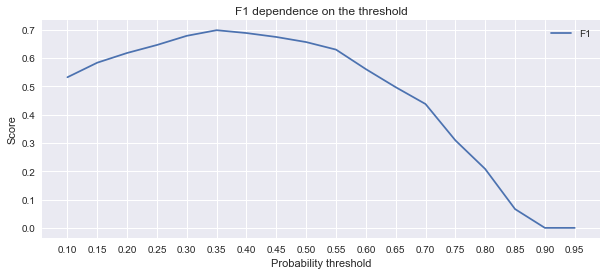

In [75]:
# график зависимости целевой метрики от порога вероятности
fig, ax = plt.subplots(figsize = (10, 4))
# линейный график зависимости f1 от порога
ax.plot(thresholds, f1, label='F1')

ax.set_title('F1 dependence on the threshold')
ax.set_xlabel('Probability threshold')
ax.set_ylabel('Score')

ax.set_xticks(thresholds)
ax.legend();

In [77]:
threshold_opt = 0.35

# клиентов, для которых вероятность ухода > 0.35, относим к классу 1, иначе - 0
y_pred_opt = y_test_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)

# Метрика
print(f'Test F1: {round(metrics.f1_score(y_test, y_pred_opt), 2)}')

Test F1: 0.7


In [79]:
pred_data = pd.DataFrame({
    'proba': y_test_proba_pred,
    'predict': y_pred_opt
})

pred_data

,proba,predict
0,0.238196,0
1,0.393225,1
2,0.042871,0
3,0.168600,0
4,0.284155,0
...,...,...
623,0.161088,0
624,0.375932,1
625,0.140587,0
626,0.077667,0
